# New Stores Format

## Problem at Hand
The given company already has 85 stores in place. They are in the process of building 10 more stores. The issue is that they do not know how to approach building the new stores. They would like to design the new stores based on the sales the store will have. 

## What is Available to us
We have the demographic information for all the store locations that could help us predict how the new stores will perform. The company does not have any segments (clusters) in place which makes this a bit more complicated. Before finding a way to classify the new stores, we would need to create segments for the 85 stores already in place. We can create the store segments based on the historical sales data that we have available. 

## Data Sample

In [1]:
import pandas as pd

df = pd.read_csv('storesalesdata.csv')  
df.head()

,Store,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
0,S0001,1,3,2012,23401.06,5567.90,3930.28,5223.61,4542.28,238.58,2608.78,1651.77,4304.79
1,S0001,2,3,2012,32442.93,8009.52,4712.31,6174.72,9503.45,245.29,2692.72,2688.89,4467.51
2,S0001,3,3,2012,40433.61,9759.20,5969.03,8010.67,12793.92,282.12,3493.85,2929.85,5721.60
3,S0001,4,3,2012,57043.39,13966.26,9008.24,13142.55,16635.77,316.72,5618.55,4270.38,8313.11
4,S0001,5,3,2012,32894.86,7870.66,5448.35,5459.29,8358.96,198.00,3339.59,2061.21,5280.16


### We can see below that we are not missing any of the sales information, therefore we are ready to proceed.

In [2]:
import re 

desc = df.describe(include = 'all')
desc

,Store,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
count,116232,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000,116232.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,S0058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.724155,6.721316,2013.584417,36390.934532,8397.150934,6335.276068,9081.584935,9010.377409,672.413915,3440.156929,2280.079253,6096.943035
std,NaN,8.806905,3.354135,1.094087,14890.373761,3293.761537,2555.173903,4702.229928,4110.302959,918.493538,1714.131638,1055.231371,3185.657326
min,NaN,1.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.220000,0.000000,0.000000,0.000000
25%,NaN,8.000000,4.000000,2013.000000,25740.890000,6124.662500,4533.350000,5865.957500,6121.592500,285.877500,2239.415000,1521.287500,3843.577500
50%,NaN,16.000000,7.000000,2014.000000,33108.630000,7723.760000,5824.170000,7905.615000,8146.405000,451.740000,3064.235000,2048.120000,5343.885000
75%,NaN,23.000000,10.000000,2015.000000,43811.120000,9977.330000,7630.460000,11050.362500,10992.710000,728.112500,4253.400000,2795.077500,7517.085000


## How to Approach Making the Store Segments

With the stores that are already in place we have data starting from the third month of 2012 though the end of 2015. In this case it would be wise to look at the total sales of 2015 to create the store segments. If we include data from previous years, it could mislead how we cluster the stores since it is possible that store sales patterns could change. Lastly, the sales amounts per category have different magnitudes, thefore we will rewrite the sales amount to percentages, this could also take care of us having to normalize the data. 

*** Below we can see the updated the data (updated on Excell)

In [3]:
dfper = pd.read_csv('storesalesdataPERCENT_2015.csv')  
dfper.head()

,Store,Per_Dry_Grocery,Per_Dairy,Per_Frozen_Food,Per_Meat,Per_Produce,Per_Floral,Per_Deli,Per_Bakery,Per_General_Merchandise
0,S0001,46.134726,10.308371,7.719925,10.767741,9.717104,0.676943,4.354993,3.554388,6.765810
1,S0002,45.752795,10.638761,7.884093,11.490345,10.125940,0.743806,3.979242,2.970153,6.414865
2,S0003,42.134909,10.235628,6.902750,11.471274,12.539881,0.963139,4.176080,3.610802,7.965537
3,S0004,45.455984,9.711102,8.027714,12.772766,10.040922,0.611963,4.178524,3.446871,5.754154
4,S0005,44.016875,10.626809,8.633852,10.186326,13.111205,0.887725,3.538921,2.260686,6.737600


In [4]:
dfper1=dfper.drop(['Store'], axis=1)
dfper1.head()

,Per_Dry_Grocery,Per_Dairy,Per_Frozen_Food,Per_Meat,Per_Produce,Per_Floral,Per_Deli,Per_Bakery,Per_General_Merchandise
0,46.134726,10.308371,7.719925,10.767741,9.717104,0.676943,4.354993,3.554388,6.765810
1,45.752795,10.638761,7.884093,11.490345,10.125940,0.743806,3.979242,2.970153,6.414865
2,42.134909,10.235628,6.902750,11.471274,12.539881,0.963139,4.176080,3.610802,7.965537
3,45.455984,9.711102,8.027714,12.772766,10.040922,0.611963,4.178524,3.446871,5.754154
4,44.016875,10.626809,8.633852,10.186326,13.111205,0.887725,3.538921,2.260686,6.737600


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import random

## How Many Store Segments Should we use?
Below we implement a method called the Elbow Method to help us determine the optimal amount of segments that we should create for the stores. Based on the graph, it seems that it might be optimal to use 3 or 4 clusters. We will run both models to see which one makes more sense.

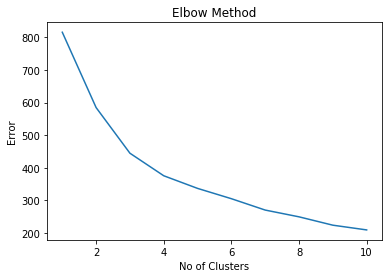

In [6]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(dfper1)
    kmeans.fit(dfper1)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.show()

In [7]:
kmeans3 = KMeans(n_clusters=3, random_state=4)
y_kmeans3 = kmeans3.fit_predict(dfper1)
print(y_kmeans3)

[2 2 1 2 1 2 1 1 0 1 2 2 0 0 0 2 1 2 2 2 1 2 1 2 2 2 1 1 0 1 0 0 1 1 2 2 0
 1 2 1 2 2 1 1 0 1 0 0 1 1 2 1 2 1 2 2 1 2 1 2 2 2 1 1 1 0 2 1 1 0 0 0 1 2
 1 1 1 1 2 2 1 2 1 2 1]


In [8]:
dfkm3 = pd.DataFrame(data=y_kmeans3, columns=["clusters"])
dfkm3

,clusters
0,2
1,2
2,1
3,2
4,1
...,...
80,1
81,2
82,1
83,2


In [9]:
dfper['Cluster3'] = dfkm3

In [10]:
dfper

,Store,Per_Dry_Grocery,Per_Dairy,Per_Frozen_Food,Per_Meat,Per_Produce,Per_Floral,Per_Deli,Per_Bakery,Per_General_Merchandise,Cluster3
0,S0001,46.134726,10.308371,7.719925,10.767741,9.717104,0.676943,4.354993,3.554388,6.765810,2
1,S0002,45.752795,10.638761,7.884093,11.490345,10.125940,0.743806,3.979242,2.970153,6.414865,2
2,S0003,42.134909,10.235628,6.902750,11.471274,12.539881,0.963139,4.176080,3.610802,7.965537,1
3,S0004,45.455984,9.711102,8.027714,12.772766,10.040922,0.611963,4.178524,3.446871,5.754154,2
4,S0005,44.016875,10.626809,8.633852,10.186326,13.111205,0.887725,3.538921,2.260686,6.737600,1
...,...,...,...,...,...,...,...,...,...,...,...
80,S0081,42.327991,10.208864,8.659221,12.349261,11.666553,0.847527,3.895595,4.294437,5.750552,1
81,S0082,46.099498,10.075956,7.528988,11.360998,10.149002,0.526935,4.826674,3.521239,5.910711,2
82,S0083,44.787259,10.886452,8.379324,10.946890,11.744324,0.709702,3.188463,2.520628,6.836957,1
83,S0084,46.030597,10.634346,9.440844,10.593586,10.082424,0.637733,4.014954,2.211860,6.353656,2


In [11]:
kmeans3.cluster_centers_

array([[44.43524052,  9.78916612,  7.64471907, 11.11490741, 10.13843479,
         0.78675809,  4.01395518,  2.30509958,  9.77171924],
       [43.48873595, 10.4915169 ,  7.97178469, 11.21544945, 12.13487066,
         0.9311523 ,  3.97069502,  2.9718256 ,  6.82396944],
       [46.45929918, 10.15169516,  7.91852755, 11.0449421 , 10.02279797,
         0.69962488,  4.14523979,  2.82863404,  6.72923934]])

In [12]:
unique, counts = np.unique(y_kmeans3, return_counts=True)
dict(zip(unique, counts))

{0: 15, 1: 37, 2: 33}

In [13]:
kmeans4 = KMeans(n_clusters=4, random_state=4)
y_kmeans4 = kmeans4.fit_predict(dfper1)
print(y_kmeans4)

[0 0 1 2 1 0 2 1 2 1 2 0 3 3 3 0 1 0 0 0 1 0 1 0 0 0 1 2 2 1 3 3 2 1 0 0 3
 2 2 2 0 0 1 2 3 1 3 3 1 1 0 1 0 1 0 0 2 0 1 2 0 0 1 1 1 3 0 1 1 3 2 3 1 2
 2 1 1 1 0 0 1 0 1 0 1]


In [14]:
kmeans4.cluster_centers_

array([[46.65883999, 10.16084406,  7.94863742, 10.75529961, 10.14587837,
         0.69415438,  4.15324054,  2.71502965,  6.76807597],
       [43.33614964, 10.59353084,  7.98592792, 10.74507805, 12.42037564,
         1.0084842 ,  3.87993111,  3.07848417,  6.95203843],
       [44.48989072, 10.07970887,  7.74911858, 12.82426485, 10.36677965,
         0.67525015,  4.24406416,  2.78209169,  6.78883133],
       [44.47788331,  9.75318228,  7.73321447, 10.68620333, 10.13959225,
         0.8212717 ,  3.9336827 ,  2.33905216, 10.11591779]])

In [15]:
unique, counts = np.unique(y_kmeans4, return_counts=True)
dict(zip(unique, counts))

{0: 28, 1: 29, 2: 16, 3: 12}

In [16]:
dfkm4 = pd.DataFrame(data=y_kmeans4, columns=["clusters"])
dfkm4

,clusters
0,0
1,0
2,1
3,2
4,1
...,...
80,1
81,0
82,1
83,0


In [17]:
dfper['Cluster4'] = dfkm4

In [18]:
dfper

,Store,Per_Dry_Grocery,Per_Dairy,Per_Frozen_Food,Per_Meat,Per_Produce,Per_Floral,Per_Deli,Per_Bakery,Per_General_Merchandise,Cluster3,Cluster4
0,S0001,46.134726,10.308371,7.719925,10.767741,9.717104,0.676943,4.354993,3.554388,6.765810,2,0
1,S0002,45.752795,10.638761,7.884093,11.490345,10.125940,0.743806,3.979242,2.970153,6.414865,2,0
2,S0003,42.134909,10.235628,6.902750,11.471274,12.539881,0.963139,4.176080,3.610802,7.965537,1,1
3,S0004,45.455984,9.711102,8.027714,12.772766,10.040922,0.611963,4.178524,3.446871,5.754154,2,2
4,S0005,44.016875,10.626809,8.633852,10.186326,13.111205,0.887725,3.538921,2.260686,6.737600,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
80,S0081,42.327991,10.208864,8.659221,12.349261,11.666553,0.847527,3.895595,4.294437,5.750552,1,1
81,S0082,46.099498,10.075956,7.528988,11.360998,10.149002,0.526935,4.826674,3.521239,5.910711,2,0
82,S0083,44.787259,10.886452,8.379324,10.946890,11.744324,0.709702,3.188463,2.520628,6.836957,1,1
83,S0084,46.030597,10.634346,9.440844,10.593586,10.082424,0.637733,4.014954,2.211860,6.353656,2,0


We will take out the data and create a visualization on Tableau. This way we can create a visual that can help us understand what is occuring with our clusters. If we see below, we have the store's location to help us do this.

In [19]:
stoinf = pd.read_csv('storeinformation.csv')  
stoinf.head()

,Store,Address,City,State,Zip,Type
0,S0001,1000 W El Norte Pkwy,Escondido,CA,92027,Existing
1,S0002,12419 Woodside Ave,Lakeside,CA,92040,Existing
2,S0003,1342 N Alvarado St,Los Angeles,CA,90026,Existing
3,S0004,671 S Rancho Santa Fe Rd,San Marcos,CA,92078,Existing
4,S0005,1430 S Fairfax Ave,Los Angeles,CA,90019,Existing


In [21]:
#dfper.to_csv('clust3_4.csv')

After viewing the image below for the clusters below, we do not feel that there is much reason to believe that we are gaining more information from having an extra cluster. 

![Map for Group of 3 and 4](clust3_4.jpg)

## How To Classify the New Stores???

Now that we have creaated segments for the current stores, we can build a classification model to find how to best fit the new stores. We will classify the stores based on the demographics of the area where the new stores will be up. 

In [22]:
stode = pd.read_csv('storedemographicdata.csv')  
stode.head()

,Store,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,...,PopPacIsl,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens
0,S0001,0.138163,0.111414,0.113228,0.081671,0.134924,0.128832,0.160429,0.131359,0.241935,...,0.002669,0.454295,0.073853,0.115967,0.223511,0.301880,0.180786,0.097168,0.006836,4260.943672
1,S0002,0.138954,0.112723,0.100572,0.074832,0.121080,0.146961,0.195456,0.109422,0.125224,...,0.002879,0.729696,0.124956,0.127915,0.206578,0.223808,0.174730,0.129133,0.012879,3061.060073
2,S0003,0.108582,0.091262,0.113486,0.111415,0.182909,0.144938,0.150248,0.097170,0.321860,...,0.000802,0.182080,0.024665,0.065257,0.114870,0.150106,0.155462,0.251445,0.238196,13740.923328
3,S0004,0.142758,0.102582,0.083941,0.062370,0.131661,0.134041,0.158762,0.183922,0.198362,...,0.001904,0.516900,0.175374,0.112920,0.095161,0.247891,0.152583,0.161462,0.054610,2947.367203
4,S0005,0.112396,0.083652,0.091313,0.103056,0.183739,0.146511,0.165692,0.113630,0.164272,...,0.001379,0.396718,0.021852,0.022854,0.070837,0.113448,0.126377,0.208777,0.435855,12124.740209


In [23]:
dfkm3st= dfkm3.applymap(str)
print(dfkm3st.dtypes)

clusters    object
dtype: object


In [24]:
stode['Cluster'] = dfkm3st
stode

,Store,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,...,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens,Cluster
0,S0001,0.138163,0.111414,0.113228,0.081671,0.134924,0.128832,0.160429,0.131359,0.241935,...,0.454295,0.073853,0.115967,0.223511,0.301880,0.180786,0.097168,0.006836,4260.943672,2
1,S0002,0.138954,0.112723,0.100572,0.074832,0.121080,0.146961,0.195456,0.109422,0.125224,...,0.729696,0.124956,0.127915,0.206578,0.223808,0.174730,0.129133,0.012879,3061.060073,2
2,S0003,0.108582,0.091262,0.113486,0.111415,0.182909,0.144938,0.150248,0.097170,0.321860,...,0.182080,0.024665,0.065257,0.114870,0.150106,0.155462,0.251445,0.238196,13740.923328,1
3,S0004,0.142758,0.102582,0.083941,0.062370,0.131661,0.134041,0.158762,0.183922,0.198362,...,0.516900,0.175374,0.112920,0.095161,0.247891,0.152583,0.161462,0.054610,2947.367203,2
4,S0005,0.112396,0.083652,0.091313,0.103056,0.183739,0.146511,0.165692,0.113630,0.164272,...,0.396718,0.021852,0.022854,0.070837,0.113448,0.126377,0.208777,0.435855,12124.740209,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S0091,0.151462,0.150146,0.102632,0.058333,0.130556,0.171053,0.161111,0.074708,0.172025,...,0.405789,0.101091,0.210909,0.368727,0.167273,0.044364,0.074909,0.032727,1054.522398,NaN
91,S0092,0.122439,0.080734,0.059196,0.072865,0.170039,0.159365,0.205499,0.129926,0.080767,...,0.471739,0.027035,0.048877,0.137926,0.136857,0.151062,0.357110,0.141133,8639.436528,NaN
92,S0093,0.155369,0.154340,0.079082,0.045366,0.132068,0.172492,0.155399,0.105914,0.082647,...,0.469771,0.013704,0.192849,0.346456,0.197459,0.108135,0.112744,0.028653,3207.438094,NaN
93,S0094,0.095859,0.084911,0.076021,0.097670,0.148337,0.145785,0.205425,0.145909,0.027359,...,0.713645,0.008479,0.019272,0.121025,0.162074,0.099827,0.189632,0.399692,4435.823519,NaN


In [25]:
stode2=stode.drop(['Store'], axis=1)
stode2.head()

,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,EdHSGrad,...,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens,Cluster
0,0.138163,0.111414,0.113228,0.081671,0.134924,0.128832,0.160429,0.131359,0.241935,0.232823,...,0.454295,0.073853,0.115967,0.223511,0.301880,0.180786,0.097168,0.006836,4260.943672,2
1,0.138954,0.112723,0.100572,0.074832,0.121080,0.146961,0.195456,0.109422,0.125224,0.299507,...,0.729696,0.124956,0.127915,0.206578,0.223808,0.174730,0.129133,0.012879,3061.060073,2
2,0.108582,0.091262,0.113486,0.111415,0.182909,0.144938,0.150248,0.097170,0.321860,0.172440,...,0.182080,0.024665,0.065257,0.114870,0.150106,0.155462,0.251445,0.238196,13740.923328,1
3,0.142758,0.102582,0.083941,0.062370,0.131661,0.134041,0.158762,0.183922,0.198362,0.206661,...,0.516900,0.175374,0.112920,0.095161,0.247891,0.152583,0.161462,0.054610,2947.367203,2
4,0.112396,0.083652,0.091313,0.103056,0.183739,0.146511,0.165692,0.113630,0.164272,0.158904,...,0.396718,0.021852,0.022854,0.070837,0.113448,0.126377,0.208777,0.435855,12124.740209,1


In [26]:
traindf = stode2[0:85]
traindf

,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,EdHSGrad,...,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens,Cluster
0,0.138163,0.111414,0.113228,0.081671,0.134924,0.128832,0.160429,0.131359,0.241935,0.232823,...,0.454295,0.073853,0.115967,0.223511,0.301880,0.180786,0.097168,0.006836,4260.943672,2
1,0.138954,0.112723,0.100572,0.074832,0.121080,0.146961,0.195456,0.109422,0.125224,0.299507,...,0.729696,0.124956,0.127915,0.206578,0.223808,0.174730,0.129133,0.012879,3061.060073,2
2,0.108582,0.091262,0.113486,0.111415,0.182909,0.144938,0.150248,0.097170,0.321860,0.172440,...,0.182080,0.024665,0.065257,0.114870,0.150106,0.155462,0.251445,0.238196,13740.923328,1
3,0.142758,0.102582,0.083941,0.062370,0.131661,0.134041,0.158762,0.183922,0.198362,0.206661,...,0.516900,0.175374,0.112920,0.095161,0.247891,0.152583,0.161462,0.054610,2947.367203,2
4,0.112396,0.083652,0.091313,0.103056,0.183739,0.146511,0.165692,0.113630,0.164272,0.158904,...,0.396718,0.021852,0.022854,0.070837,0.113448,0.126377,0.208777,0.435855,12124.740209,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.119311,0.100858,0.077170,0.058915,0.136299,0.162258,0.202785,0.142389,0.113623,0.187888,...,0.383996,0.093634,0.060870,0.057686,0.121196,0.140295,0.335326,0.190994,7537.888960,1
81,0.111088,0.106187,0.084337,0.049214,0.100265,0.125587,0.238309,0.185215,0.203742,0.238527,...,0.709967,0.259005,0.086621,0.183533,0.134648,0.117496,0.120069,0.098628,960.560197,2
82,0.121558,0.109939,0.083011,0.065597,0.146077,0.159434,0.194871,0.119515,0.143696,0.207447,...,0.411022,0.031873,0.027729,0.080478,0.179124,0.212271,0.343904,0.124622,6165.946566,1
83,0.120931,0.117409,0.093383,0.060457,0.135054,0.155984,0.198778,0.118004,0.107730,0.237995,...,0.444539,0.022006,0.019841,0.072222,0.205051,0.250722,0.389466,0.040693,6818.896918,2


In [159]:
classdf = stode2[85:95]
classdf = classdf.drop(['Cluster'], axis=1)
classdf

,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,EdHSGrad,...,PopPacIsl,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens
85,0.177501,0.131803,0.113386,0.082463,0.150495,0.125000,0.136751,0.082532,0.365076,0.278419,...,0.000756,0.179619,0.130383,0.137560,0.088517,0.113038,0.121411,0.325359,0.083732,2094.407018
86,0.133389,0.105858,0.078929,0.069141,0.147039,0.158200,0.176631,0.130842,0.096118,0.197230,...,0.003119,0.506368,0.017774,0.018442,0.092075,0.113324,0.097020,0.345450,0.315916,6256.727920
87,0.149539,0.120216,0.109984,0.078756,0.145287,0.135409,0.164644,0.096208,0.319503,0.221453,...,0.004828,0.043139,0.047129,0.028211,0.094922,0.155659,0.133090,0.375705,0.165284,8043.562891
88,0.126739,0.072234,0.079971,0.091316,0.181626,0.149603,0.174305,0.124310,0.088237,0.183738,...,0.005308,0.453006,0.035694,0.060048,0.060978,0.080312,0.068786,0.415691,0.278490,7547.025711
89,0.125962,0.083329,0.066046,0.071485,0.165691,0.157856,0.187537,0.142001,0.070983,0.165373,...,0.006590,0.527099,0.022281,0.019634,0.017648,0.070152,0.054269,0.291198,0.524818,7621.043926
90,0.151462,0.150146,0.102632,0.058333,0.130556,0.171053,0.161111,0.074708,0.172025,0.254724,...,0.006286,0.405789,0.101091,0.210909,0.368727,0.167273,0.044364,0.074909,0.032727,1054.522398
91,0.122439,0.080734,0.059196,0.072865,0.170039,0.159365,0.205499,0.129926,0.080767,0.120416,...,0.001625,0.471739,0.027035,0.048877,0.137926,0.136857,0.151062,0.357110,0.141133,8639.436528
92,0.155369,0.154340,0.079082,0.045366,0.132068,0.172492,0.155399,0.105914,0.082647,0.230951,...,0.004384,0.469771,0.013704,0.192849,0.346456,0.197459,0.108135,0.112744,0.028653,3207.438094
93,0.095859,0.084911,0.076021,0.097670,0.148337,0.145785,0.205425,0.145909,0.027359,0.109603,...,0.001893,0.713645,0.008479,0.019272,0.121025,0.162074,0.099827,0.189632,0.399692,4435.823519
94,0.091946,0.081672,0.159955,0.077974,0.126156,0.142285,0.205979,0.114136,0.089858,0.173551,...,0.002157,0.567129,0.196016,0.053418,0.183794,0.184699,0.189679,0.181077,0.011317,2663.834099


## Decision Trees

In [138]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import tree

In [139]:
X = traindf.values[:, 0:44]
X

array([[0.138162853708721, 0.11141442744514801, 0.11322753478517698, ...,
        0.09716796875, 0.0068359375, 4260.94367229788],
       [0.13895424377567903, 0.11272254802121, 0.10057239175474901, ...,
        0.129133310128785, 0.0128785241907414, 3061.0600725869604],
       [0.10858198726864801, 0.0912616627917602, 0.11348568991949001,
        ..., 0.251444679351656, 0.23819591261451697, 13740.9233280646],
       ...,
       [0.12155774450306499, 0.10993870269281199, 0.0830105821719374,
        ..., 0.34390438247011995, 0.124621513944223, 6165.94656610224],
       [0.12093110313260401, 0.11740883799281901, 0.0933825656383468,
        ..., 0.389466089466089, 0.0406926406926407, 6818.896917933521],
       [0.0921679626749611, 0.0816796267496112, 0.0891197511664075, ...,
        0.237295983331404, 0.184049079754601, 10557.0481450515]],
      dtype=object)

In [140]:
Y = traindf.values[:,44]
Y

array(['2', '2', '1', '2', '1', '2', '1', '1', '0', '1', '2', '2', '0',
       '0', '0', '2', '1', '2', '2', '2', '1', '2', '1', '2', '2', '2',
       '1', '1', '0', '1', '0', '0', '1', '1', '2', '2', '0', '1', '2',
       '1', '2', '2', '1', '1', '0', '1', '0', '0', '1', '1', '2', '1',
       '2', '1', '2', '2', '1', '2', '1', '2', '2', '2', '1', '1', '1',
       '0', '2', '1', '1', '0', '0', '0', '1', '2', '1', '1', '1', '1',
       '2', '2', '1', '2', '1', '2', '1'], dtype=object)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.2, random_state = 3) 

In [142]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 3,max_depth=20, min_samples_leaf=7)

In [143]:
tree_clf = clf_gini.fit(X_train, y_train)

In [144]:
ypred = tree_clf.predict(X_test)

In [145]:
print("Accuracy:", accuracy_score(y_test, ypred))

Accuracy: 0.5882352941176471


In [146]:
print("Confusion Matrix:", confusion_matrix(y_test, ypred))

Confusion Matrix: [[1 2 0]
 [0 6 1]
 [1 3 3]]


In [147]:
print("Report : ", classification_report(y_test, ypred)) 

Report :                precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.55      0.86      0.67         7
           2       0.75      0.43      0.55         7

    accuracy                           0.59        17
   macro avg       0.60      0.54      0.54        17
weighted avg       0.62      0.59      0.57        17



[Text(193.15384615384616, 190.26, 'X[9] <= 0.224\ngini = 0.628\nsamples = 68\nvalue = [12, 30, 26]'),
 Text(103.01538461538462, 135.9, 'X[0] <= 0.125\ngini = 0.491\nsamples = 40\nvalue = [6, 27, 7]'),
 Text(51.50769230769231, 81.53999999999999, 'X[36] <= 0.022\ngini = 0.153\nsamples = 24\nvalue = [0, 22, 2]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.408\nsamples = 7\nvalue = [0, 5, 2]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0]'),
 Text(154.52307692307693, 81.53999999999999, 'X[17] <= 0.294\ngini = 0.664\nsamples = 16\nvalue = [6, 5, 5]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.494\nsamples = 9\nvalue = [4, 5, 0]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.408\nsamples = 7\nvalue = [2, 0, 5]'),
 Text(283.2923076923077, 135.9, 'X[1] <= 0.124\ngini = 0.482\nsamples = 28\nvalue = [6, 3, 19]'),
 Text(257.53846153846155, 81.53999999999999, 'X[14] <= 0.008\ngini = 0.219\nsamples = 16\nvalue = [0

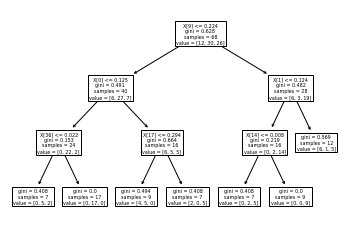

In [148]:
tree.plot_tree(tree_clf)

## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt', random_state=4)

In [108]:
rndfor=model.fit(X_train, y_train)

In [109]:
y_pred_for = rndfor.predict(X_test)

In [110]:
print("Accuracy:", accuracy_score(y_test, y_pred_for))

Accuracy: 0.7058823529411765


In [111]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_for))

Confusion Matrix: [[2 0 1]
 [0 6 1]
 [2 1 4]]


In [112]:
print("Report : ", classification_report(y_test, y_pred_for)) 

Report :                precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.86      0.86      0.86         7
           2       0.67      0.57      0.62         7

    accuracy                           0.71        17
   macro avg       0.67      0.70      0.68        17
weighted avg       0.72      0.71      0.71        17



## Boosted Model

In [119]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
boos = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=4)

In [121]:
boosted = boos.fit(X_train, y_train)

In [122]:
y_pred_boos = boos.predict(X_test)

In [123]:
print("Accuracy:", accuracy_score(y_test, y_pred_boos))

Accuracy: 0.8235294117647058


In [124]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_boos))

Confusion Matrix: [[3 0 0]
 [0 7 0]
 [2 1 4]]


In [125]:
print("Report : ", classification_report(y_test, y_pred_boos))

Report :                precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.88      1.00      0.93         7
           2       1.00      0.57      0.73         7

    accuracy                           0.82        17
   macro avg       0.83      0.86      0.80        17
weighted avg       0.88      0.82      0.82        17



## Decision
After viewing all of the reports, we can see how the boosted gradient model outperforms the other two models in every category. Therefore, we will make our classify the new stores based on the bossted gradient model. 

## Predicting for the New Stores

In [160]:
new_stores_segment = boos.predict(classdf)
new_stores_segment

array(['2', '1', '2', '1', '1', '0', '1', '2', '1', '1'], dtype=object)